In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [2]:
df1 = pd.read_csv('dataset/raw_data.csv')
df2 = pd.read_csv('price-dataset/raw_price_data.csv')
df = pd.merge(df1, df2, left_on='product', right_on='product', how='inner')
df['price'].fillna(349.97, inplace=True)
df

,comments,date,ratings,helpful,cs_score,category,product,price
0,"I would rate the 65"" CX as a 5/5 TV, but the n...",2020-04-10,2.0,966,87,Electronics > TVs,LG OLED65CXPUA TV,2164.495
1,"For $1800, you would expect a TV to have a gre...",2020-05-13,4.0,359,87,Electronics > TVs,LG OLED65CXPUA TV,2164.495
2,Updated review (10/13/2020)\n\nMounting was a ...,2020-05-27,5.0,254,87,Electronics > TVs,LG OLED65CXPUA TV,2164.495
3,"I just got this yesterday. So this review, at ...",2020-04-23,5.0,146,87,Electronics > TVs,LG OLED65CXPUA TV,2164.495
4,"Yes, this is an amazing visual product and wel...",2020-08-11,1.0,131,87,Electronics > TVs,LG OLED65CXPUA TV,2164.495
...,...,...,...,...,...,...,...,...
84969,"Great product, decent price and super easy to ...",2021-04-06,5.0,1,80,Blood Pressure Monitors: Arm Models (-0.17),Omron 3 Series BP7100,34.415
84970,Works great for my mom,2021-03-09,5.0,0,80,Blood Pressure Monitors: Arm Models (-0.17),Omron 3 Series BP7100,34.415
84971,This is the second unit I bought. The first wa...,2021-04-19,5.0,1,80,Blood Pressure Monitors: Arm Models (-0.17),Omron 3 Series BP7100,34.415
84972,Works great,2021-04-06,5.0,0,80,Blood Pressure Monitors: Arm Models (-0.17),Omron 3 Series BP7100,34.415


In [3]:
df['date'].min()

'2000-05-02'

In [4]:
ratings = df['ratings'].value_counts().sort_index()
rating_df = pd.DataFrame(ratings)
rating_df['RATING'] = rating_df['ratings'] / rating_df['ratings'].sum()

In [5]:
rating_df.head()

,ratings,RATING
1.0,11048,0.130016
2.0,4954,0.058300
3.0,5895,0.069374
4.0,10208,0.120131
5.0,52869,0.622179


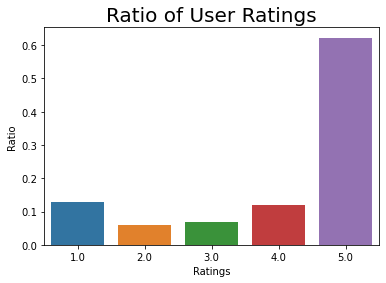

In [6]:
sns.barplot(x=rating_df.index, y=rating_df['RATING'])
plt.title("Ratio of User Ratings", fontsize=20)
plt.xlabel("Ratings")
plt.ylabel("Ratio")
plt.savefig("Ratio of User Ratings")

In [7]:
df['cs_score'].value_counts().sort_index()

50      383
52      269
54       37
55      277
58      515
60      387
66     5070
68      319
69    12787
70       47
71     9421
73      217
74     1757
75     3325
76      178
77     1740
78     4668
80      549
81     5537
83     2247
84     3453
85     3472
86     3766
87     4983
88     5039
89     9974
90      535
91      147
92     1060
93      349
95     2466
Name: cs_score, dtype: int64

In [9]:
len(df['cs_score'].value_counts().index)

31

In [44]:
cs_scores = df['cs_score'].value_counts().sort_index()
cs_scores_df = pd.DataFrame(cs_scores)
cs_scores_df['cs_score'] = cs_scores_df['cs_score'] / cs_scores_df['cs_score'].sum()

In [45]:
cs_scores_df.head()

,cs_score
50,0.004507
52,0.003166
54,0.000435
55,0.003260
58,0.006061


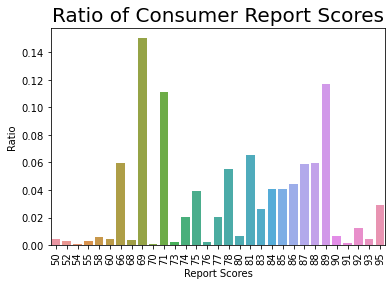

In [50]:
sns.barplot(x=cs_scores_df.index, y=cs_scores_df['cs_score'])
plt.title("Ratio of Consumer Report Scores", fontsize=20)
plt.xlabel("Report Scores")
plt.ylabel("Ratio")
plt.xticks(rotation=90)
plt.savefig("Ratio of Consumer Report Scores")

In [3]:
avg_df = df.groupby('product')['ratings', 'price', 'cs_score'].mean().add_suffix('_mean').reset_index()
count_df = df.groupby('product')['ratings'].count().reset_index()
std_df = df.groupby('product')['ratings'].std().reset_index()

<ipython-input-3-873e2906ce56>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_df = df.groupby('product')['ratings', 'price', 'cs_score'].mean().add_suffix('_mean').reset_index()


In [4]:
avg_cnt = pd.merge(avg_df, count_df, left_on='product', right_on='product', how='inner')
agg_df = pd.merge(avg_cnt, std_df, left_on='product', right_on='product', how='inner')
agg_df['se'] = agg_df['ratings_y'] / np.sqrt(agg_df['ratings_x'])
agg_df = agg_df.drop(columns='ratings_y')
agg_df.rename(columns={"ratings_x": "rating_cnt"}, inplace=True)
agg_df['ratingsXse'] = agg_df['ratings_mean'] * agg_df['se']
agg_df.iloc[29, 2] = 349.97
agg_df

,product,ratings_mean,price_mean,cs_score_mean,rating_cnt,se,ratingsXse
0,Amazon Fire 7 (16GB) - 2019 Tablet,3.257400,49.990,66,5000,0.021470,0.069936
1,Amazon Fire HD 8 Plus Tablet,4.217000,109.990,71,5000,0.017400,0.073376
2,"Apple IPad Air (4G, 64GB) - 2020 Tablet",4.585608,738.170,87,806,0.036903,0.169222
3,Apple IPad Mini (64GB) - 2019 Tablet,4.627172,384.495,83,1266,0.028050,0.129791
4,"Apple IPad Pro 11 (4G, 128GB) - 2020 Tablet",4.440994,849.990,87,483,0.056267,0.249883
...,...,...,...,...,...,...,...
89,Vitamix Vitamix 12-Cup Food Processor Attachme...,3.702128,227.975,70,47,0.246933,0.914177
90,WW WW26 Bathroom Scale,3.492481,28.995,89,266,0.109195,0.381360
91,Withings Body Bathroom Scale,3.915217,59.990,90,460,0.070978,0.277894
92,Zwilling J.A. Henckels Four Star Kitchen Knife,4.666667,99.970,85,219,0.058371,0.272399


In [28]:
agg_df.describe()

,ratings_mean,price_mean,cs_score_mean,rating_cnt,se,ratingsXse
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,3.998980,368.088351,78.904255,903.978723,0.106146,0.411475
std,0.404306,514.989523,9.891964,1318.503705,0.123848,0.475045
min,2.914286,0.280000,50.000000,4.000000,0.015492,0.069508
25%,3.688925,61.033750,73.000000,147.500000,0.042368,0.186365
50%,4.023686,142.992500,81.000000,339.000000,0.076829,0.311071
75%,4.278286,428.736250,86.750000,974.750000,0.120123,0.482711
max,4.666667,2999.990000,95.000000,5000.000000,1.000000,4.000000


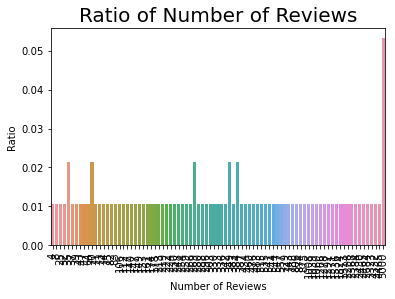

In [54]:
rating_cnt = agg_df['rating_cnt'].value_counts().sort_index()
count_df = pd.DataFrame(rating_cnt)
count_df['rating_cnt'] = count_df['rating_cnt'] / count_df['rating_cnt'].sum()

sns.barplot(x=count_df.index, y=count_df['rating_cnt'])
plt.title("Ratio of Number of Reviews", fontsize=20)
plt.xlabel("Number of Reviews")
plt.ylabel("Ratio")
plt.xticks(rotation=90)
plt.savefig("Ratio of Number of Reviews")

### Visualization

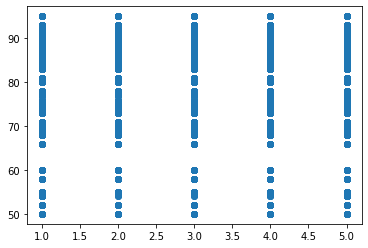

In [5]:
plt.scatter(df['ratings'], df['cs_score'])

### Dummy Regression

In [6]:
dummies = pd.get_dummies(df['ratings'], drop_first=True)
dummies

,2.0,3.0,4.0,5.0
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
84969,0,0,0,1
84970,0,0,0,1
84971,0,0,0,1
84972,0,0,0,1


In [7]:
X = dummies
Y = df['cs_score']


X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               cs_score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     65.49
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.11e-55
Time:                        14:30:50   Log-Likelihood:            -3.0852e+05
No. Observations:               84974   AIC:                         6.170e+05
Df Residuals:                   84969   BIC:                         6.171e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7829      0.087    918.262      0.0

### Scaling & Regression

In [8]:
mean_val = df['ratings'].mean()
std_val = df['ratings'].std()

In [9]:
X = df['ratings']
scaled_X = X.apply(lambda x: x - mean_val / std_val)
Y = df['cs_score']


scaled_X = sm.add_constant(scaled_X)

model = sm.OLS(Y, scaled_X).fit()
predictions = model.predict(scaled_X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               cs_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     37.02
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.17e-09
Time:                        14:30:50   Log-Likelihood:            -3.0863e+05
No. Observations:               84974   AIC:                         6.173e+05
Df Residuals:                   84972   BIC:                         6.173e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.0064      0.041   1906.197      0.0

### 논문 구현(Model A)
cs_score ~ avg_user_ratings + SE + (avg_user_ratings x SE) + price

In [73]:
scaled_agg = agg_df.copy()

In [74]:
def min_max_scaler(series):
    _min = series.min()
    _max = series.max()
    series = series.apply(lambda x: (x - _min)/(_max - _min))
    return series

In [80]:
scaled_agg['ratings_mean'] = min_max_scaler(scaled_agg['ratings_mean'])
scaled_agg['se'] = min_max_scaler(scaled_agg['se'])
scaled_agg['ratingsXse'] = min_max_scaler(scaled_agg['ratingsXse'])
scaled_agg['price_mean'] = min_max_scaler(scaled_agg['price_mean'])
scaled_agg['cs_score_mean'] = min_max_scaler(scaled_agg['cs_score_mean'])

In [82]:
X = scaled_agg[['ratings_mean', 'se', 'ratingsXse', 'price_mean']]
Y = scaled_agg['cs_score_mean']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          cs_score_mean   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.612
Date:                Wed, 26 May 2021   Prob (F-statistic):              0.178
Time:                        17:19:14   Log-Likelihood:                 12.814
No. Observations:                  94   AIC:                            -15.63
Df Residuals:                      89   BIC:                            -2.911
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8061      0.117      6.920   

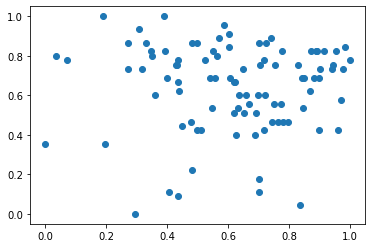

In [84]:
plt.scatter(scaled_agg['ratings_mean'], scaled_agg['cs_score_mean'])

### Sentiment Analysis

In [13]:
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [14]:
def nlp(msg):
    msg = str(msg)
    msg = msg.lower()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', msg)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)

def sentiment_analyzer_scores(comment):
    score = analyzer.polarity_scores(comment)
    return score

def extract_valence(comment):
    valence = None
    
    if (comment['pos'] > 0) and (comment['compound'] >= 0.05):
        valence = 1
    elif (comment['neg'] > 0) and (comment['compound'] <= -0.05):
        valence = -1
    elif (comment['neu'] > 0) and (-0.05 < comment['compound'] < 0.05):
        valence = 0

    return valence

In [15]:
df['comments_nlp'] = df['comments'].apply(lambda x: nlp(x))

In [16]:
df['sentiment'] = df['comments_nlp'].apply(lambda x: sentiment_analyzer_scores(x))

In [17]:
df['valence'] = df['sentiment'].apply(lambda x: extract_valence(x))

In [18]:
df[['comments_nlp', 'sentiment', 'valence']]

,comments_nlp,sentiment,valence
0,would rate number softwar issu bug experienc m...,"{'neg': 0.045, 'neu': 0.79, 'pos': 0.165, 'com...",1.0
1,would expect great pictur one worth price plea...,"{'neg': 0.068, 'neu': 0.739, 'pos': 0.193, 'co...",1.0
2,updat review mount breez took minut screw moun...,"{'neg': 0.058, 'neu': 0.794, 'pos': 0.148, 'co...",1.0
3,got yesterday review point first impress tri w...,"{'neg': 0.012, 'neu': 0.881, 'pos': 0.108, 'co...",1.0
4,ye amaz visual product well worth pay need tel...,"{'neg': 0.093, 'neu': 0.795, 'pos': 0.113, 'co...",1.0
...,...,...,...
84969,great product decent price super easi use reco...,"{'neg': 0.093, 'neu': 0.447, 'pos': 0.46, 'com...",1.0
84970,work great mom,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...",1.0
84971,second unit bought first expens featur turn ac...,"{'neg': 0.037, 'neu': 0.841, 'pos': 0.122, 'co...",1.0
84972,work great,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",1.0


### New Regression Modeling
cs_score = user_rating + valence + price

In [89]:
new_df = pd.concat([df[['ratings', 'price']], pd.get_dummies(df['valence'], drop_first=True)], axis=1)
new_df.rename(columns={0.0: "neutral", 1.0: "positive"}, inplace=True)
new_df

,ratings,price,neutral,positive
0,2.0,2164.495,0,1
1,4.0,2164.495,0,1
2,5.0,2164.495,0,1
3,5.0,2164.495,0,1
4,1.0,2164.495,0,1
...,...,...,...,...
84969,5.0,34.415,0,1
84970,5.0,34.415,0,1
84971,5.0,34.415,0,1
84972,5.0,34.415,0,1


In [95]:
new_df['ratings'] = min_max_scaler(new_df['ratings'])
new_df['price'] = min_max_scaler(new_df['price'])
new_df['cs_score'] = min_max_scaler(df['cs_score'])

In [96]:
X = new_df[['ratings', 'neutral', 'positive', 'price']]
Y = new_df['cs_score']


X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               cs_score   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     966.5
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        17:58:08   Log-Likelihood:                 16709.
No. Observations:               84974   AIC:                        -3.341e+04
Df Residuals:                   84969   BIC:                        -3.336e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6208      0.002    288.102      0.0

### Visualization

In [21]:
df['valence'].unique()

array([ 1., -1.,  0., nan])

In [104]:
from scipy.stats import ttest_ind

cat1 = df[df['valence']==1]
cat2 = df[df['valence']==-1]

ttest_ind(cat1['ratings'], cat2['ratings'])

Ttest_indResult(statistic=127.58237796394509, pvalue=0.0)

In [22]:
data = [df[df['valence']==1]['cs_score'],
       df[df['valence']==0]['cs_score'],
       df[df['valence']==-1]['cs_score']]

In [97]:
data2 = [df[df['valence']==1]['ratings'],
       df[df['valence']==0]['ratings'],
       df[df['valence']==-1]['ratings']]

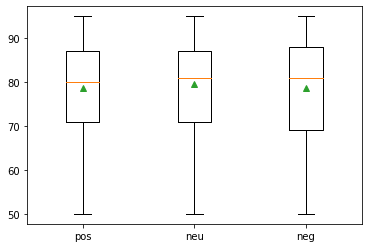

In [24]:
plt.boxplot(data, labels=['pos', 'neu', 'neg'], showmeans=True)
plt.show()

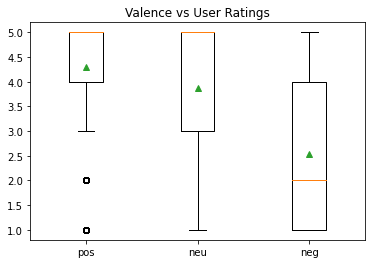

In [98]:
plt.boxplot(data2, labels=['pos', 'neu', 'neg'], showmeans=True)
plt.title("Valence vs User Ratings")
plt.savefig("valence")